In [248]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import contextily as cx
from sklearn.cluster import KMeans


In [249]:
trx01_df = pd.read_csv('./data/transit_dfs/TRX01_df.csv', low_memory=False, header=1)
# trx01_df['Latitude_ddeg'] = trx01_df['Latitude_ddeg'].round(4)
# trx01_df['Longitude_ddeg'] = trx01_df['Longitude_ddeg'].round(4)
trx01_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.0,-9999.0,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.0,-9999.0,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.0,-9999.0,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00


In [250]:
trx01_loc_df = trx01_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
trx01_loc_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426722,2023-09-30 23:55:02,40.545792,-112.015762,1475.4,13.32,28.82,21.89,21.65,6.0,2.0,...,2023,9,273,30,55,23,TRX01,Good,< 12.00,6.00 - 8.00
1426723,2023-09-30 23:56:02,40.551926,-112.021736,1491.4,13.36,28.79,21.89,21.58,5.0,2.0,...,2023,9,273,30,56,23,TRX01,Good,< 12.00,4.00 - 6.00
1426724,2023-09-30 23:57:02,40.558887,-112.024696,1515.4,13.36,28.72,21.72,21.75,23.0,2.0,...,2023,9,273,30,57,23,TRX01,Moderate,12.00 - 35.50,20.00 - 28.00
1426725,2023-09-30 23:58:02,40.563351,-112.024689,1505.8,13.36,28.69,21.69,21.92,10.0,2.0,...,2023,9,273,30,58,23,TRX01,Good,< 12.00,10.00 - 12.00


In [251]:
trx01_df.columns

Index(['Timestamp_UTC', 'Latitude_ddeg', 'Longitude_ddeg', 'Elevation_m',
       'Battery_Voltage_volts', 'Train_Box_Temperature_degC',
       'Train_Top_Relative_Humidity_%', 'Train_Top_Temperature_degC',
       'ES642_PM2.5_Concentration_ug/m3', 'ES642_Air_Flow_Rate_L/min',
       'ES642_Internal_Air_Temperature_degC',
       'ES642_Internal_Relative_Humidity_%', 'ES642_Internal_Air_Pressure_hpa',
       'ES642_Error_Code_code', '2B_Ozone_Concentration_ppbv',
       '2B_Air_Flow_Rate_L/min', '2B_Internal_Air_Temperature_degC',
       '2B_Internal_Air_Pressure_hpa', 'PM2.5_Data_Flagged_binary',
       'Ozone_Data_Flagged_binary', 'Time_Tuple', 'Date', 'Year', 'Month',
       'Day_of_Year', 'Day_of_Month', 'Minute', 'Hour', 'Transit_ID', 'AQI',
       'PM2.5_Category', 'Meso_West_Category'],
      dtype='object')

In [252]:
# pm25_cols = trx01_df.filter(like='PM2.5_Concentration_ug/m3')
# ozone_cols = trx01_df.filter(like='Ozone_Concentration_ppbv')

trx01_pm25_avg = trx01_loc_df['ES642_PM2.5_Concentration_ug/m3'].mean()

# bus01_pm25_avg = bus01_loc_df['ES642_PM2.5_Concentration_ug/m3'].mean()
trx01_pm25_avg = trx01_pm25_avg.reset_index()
trx01_pm25_avg.head()

,Latitude_ddeg,Longitude_ddeg,ES642_PM2.5_Concentration_ug/m3
0,40.524826,-111.855080,1.000000
1,40.524830,-111.855080,1.200000
2,40.524834,-111.855087,1.222222
3,40.524837,-111.855087,1.153846
4,40.524841,-111.855087,1.000000


In [253]:
# pm25_cols = bus01_df.filter(like='PM2.5_Concentration_ug/m3')
# ozone_cols = bus01_df.filter(like='Ozone_Concentration_ppbv')

# pm25_cols.head(20)

In [254]:
slc_shapefile_path = 'zcta_data/slc_zcta.shp'
slc_gdf = gpd.read_file(slc_shapefile_path)

In [255]:
# slc_gdf.plot(linewidth=1.0, edgecolor='0.8', alpha=0.75)
# plt.axis('off')
# plt.show()

In [256]:
trx01_pm25_avg_gdf = gpd.GeoDataFrame(trx01_pm25_avg, geometry=gpd.points_from_xy(trx01_pm25_avg.Longitude_ddeg, trx01_pm25_avg.Latitude_ddeg), crs='EPSG:4326')

trx01_pm25_avg_gdf.head()
trx01_pm25_avg_gdf_first = trx01_pm25_avg_gdf.iloc[:5]
trx01_pm25_avg_gdf_last = trx01_pm25_avg_gdf.iloc[-5:]
trx01_pm25_avg_gdf_down = trx01_pm25_avg_gdf.iloc[::1000]

<Axes: >

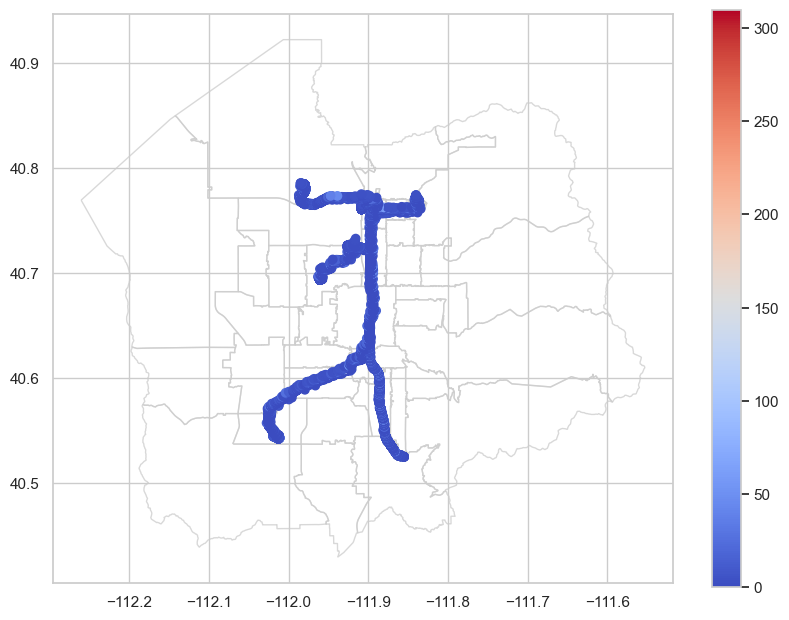

In [257]:
max_pm25 = trx01_pm25_avg['ES642_PM2.5_Concentration_ug/m3'].max()
round_max_pm25 = round(max_pm25 / 5) * 5

fig, ax = plt.subplots(figsize=(10,15))

slc_gdf.plot(ax=ax, linewidth=1.0, edgecolor='0.8', alpha=0.75, facecolor='none')
# plt.axis('off')
trx01_pm25_avg_gdf.plot(ax=ax, column='ES642_PM2.5_Concentration_ug/m3', cmap='coolwarm', legend=True, vmin=0, vmax=round_max_pm25, legend_kwds={'shrink': 0.5})
# trx01_pm25_avg_gdf_first.plot(ax=ax, column='ES642_PM2.5_Concentration_ug/m3', cmap='coolwarm')
# trx01_pm25_avg_gdf_last.plot(ax=ax, column='ES642_PM2.5_Concentration_ug/m3', cmap='coolwarm')
# trx01_pm25_avg_gdf_down.plot(ax=ax, column='ES642_PM2.5_Concentration_ug/m3', cmap='coolwarm')


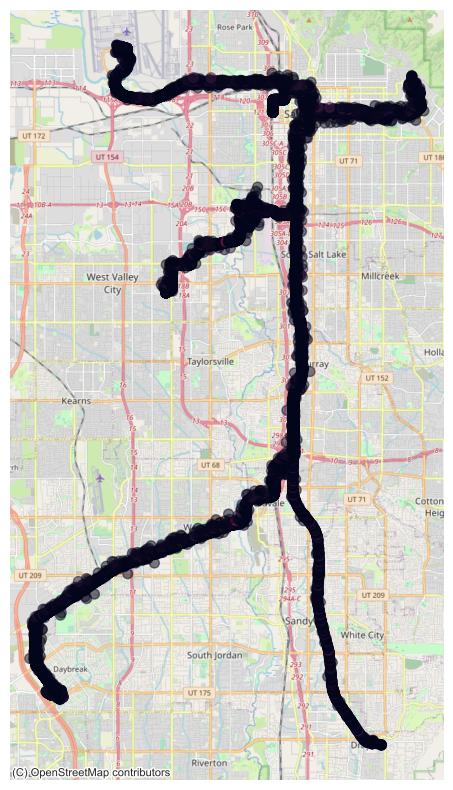

In [258]:
pm25_neutralmap = trx01_pm25_avg_gdf.to_crs(epsg=3857).plot(figsize=(8, 10), # Set the figure size
                                                alpha=0.5, # Set the transparency
                                                column='ES642_PM2.5_Concentration_ug/m3', # Set the column to color by
                                                markersize=50, # Set the size of the markers
                                                ) # Set legend location
cx.add_basemap(ax=pm25_neutralmap, # Add the basemap
               crs='EPSG:3857', # Set the coordinate reference system
               source=cx.providers.OpenStreetMap.Mapnik) # Set the source of the basemap
# avy_neutralmap.set_title('Avalanche Locations by Region in Utah', fontsize=14) # Add the title
pm25_neutralmap.set_axis_off() # Turn off the axis

In [259]:
trx01_pm25_avg_sorted = trx01_pm25_avg.sort_values(by='Latitude_ddeg', ascending=True)
trx01_pm25_avg_sorted.head(20)

,Latitude_ddeg,Longitude_ddeg,ES642_PM2.5_Concentration_ug/m3
0,40.524826,-111.855080,1.000000
1,40.524830,-111.855080,1.200000
2,40.524834,-111.855087,1.222222
3,40.524837,-111.855087,1.153846
4,40.524841,-111.855087,1.000000
5,40.524963,-111.855446,1.000000
6,40.524967,-111.855453,0.000000
7,40.524967,-111.855446,0.500000
8,40.525261,-111.859596,2.000000
9,40.525269,-111.859596,2.000000


<Axes: xlabel='Latitude_ddeg', ylabel='ES642_PM2.5_Concentration_ug/m3'>

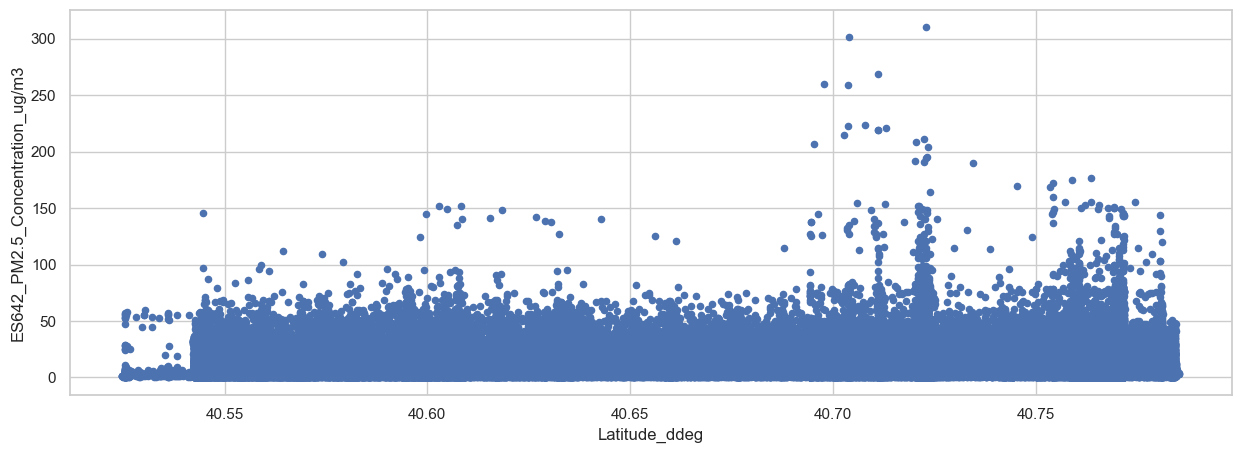

In [260]:
fig, ax = plt.subplots(figsize=(15, 5))
trx01_pm25_avg_sorted.plot(ax=ax, kind='scatter', x='Latitude_ddeg', y='ES642_PM2.5_Concentration_ug/m3')

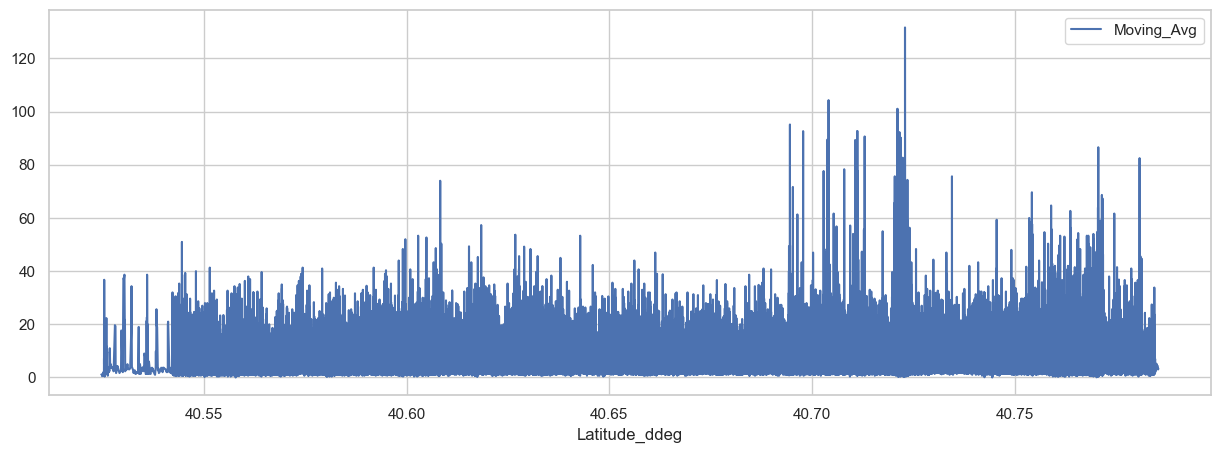

In [261]:
trx01_pm25_avg_sorted['Moving_Avg'] = trx01_pm25_avg_sorted['ES642_PM2.5_Concentration_ug/m3'].rolling(window=3).mean()
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the moving average
trx01_pm25_avg_sorted.plot(ax=ax, kind='line', x='Latitude_ddeg', y='Moving_Avg')

plt.show()

In [262]:
trx01_pm25_avg_sorted['State_St_Long'] = -111.888245
trx01_pm25_avg_sorted.head()

,Latitude_ddeg,Longitude_ddeg,ES642_PM2.5_Concentration_ug/m3,Moving_Avg,State_St_Long
0,40.524826,-111.855080,1.000000,NaN,-111.888245
1,40.524830,-111.855080,1.200000,NaN,-111.888245
2,40.524834,-111.855087,1.222222,1.140741,-111.888245
3,40.524837,-111.855087,1.153846,1.192023,-111.888245
4,40.524841,-111.855087,1.000000,1.125356,-111.888245


In [263]:
from geopy.distance import geodesic

start_lat = trx01_pm25_avg_sorted['Latitude_ddeg'].iloc[0]
start_long = trx01_pm25_avg_sorted['Longitude_ddeg'].iloc[0]

trx01_pm25_avg_sorted['Distance_km'] = trx01_pm25_avg_sorted.apply(lambda row: geodesic((start_lat, -111.888245), (row['Latitude_ddeg'], row['State_St_Long'])).km, axis=1)


In [264]:
trx01_pm25_avg_sorted.head(20)

,Latitude_ddeg,Longitude_ddeg,ES642_PM2.5_Concentration_ug/m3,Moving_Avg,State_St_Long,Distance_km
0,40.524826,-111.855080,1.000000,NaN,-111.888245,0.000000
1,40.524830,-111.855080,1.200000,NaN,-111.888245,0.000444
2,40.524834,-111.855087,1.222222,1.140741,-111.888245,0.000888
3,40.524837,-111.855087,1.153846,1.192023,-111.888245,0.001221
4,40.524841,-111.855087,1.000000,1.125356,-111.888245,0.001666
5,40.524963,-111.855446,1.000000,1.051282,-111.888245,0.015213
6,40.524967,-111.855453,0.000000,0.666667,-111.888245,0.015657
7,40.524967,-111.855446,0.500000,0.500000,-111.888245,0.015657
8,40.525261,-111.859596,2.000000,0.833333,-111.888245,0.048304
9,40.525269,-111.859596,2.000000,1.500000,-111.888245,0.049193


In [265]:
trx01_pm25_dist = trx01_pm25_avg_sorted.groupby(['Distance_km'])
trx01_pm25_dist_avg = trx01_pm25_dist['ES642_PM2.5_Concentration_ug/m3'].mean()
trx01_pm25_dist_avg = trx01_pm25_dist_avg.reset_index()
trx01_pm25_dist_avg.head()

,Distance_km,ES642_PM2.5_Concentration_ug/m3
0,0.000000,1.000000
1,0.000444,1.200000
2,0.000888,1.222222
3,0.001221,1.153846
4,0.001666,1.000000


In [280]:
trx01_pm25_dist_avg['Distance_Bin'] = pd.cut(trx01_pm25_dist_avg['Distance_km'], bins=np.arange(trx01_pm25_dist_avg['Distance_km'].min(), trx01_pm25_dist_avg['Distance_km'].max() + 0.1, 0.1))

trx01_pm25_dist_avg.head(50)

,Distance_km,ES642_PM2.5_Concentration_ug/m3,Moving_Avg,Distance_Bin
0,0.000000,1.000000,NaN,NaN
1,0.000444,1.200000,NaN,"(0.0, 0.1]"
2,0.000888,1.222222,1.140741,"(0.0, 0.1]"
3,0.001221,1.153846,1.192023,"(0.0, 0.1]"
4,0.001666,1.000000,1.125356,"(0.0, 0.1]"
5,0.015213,1.000000,1.051282,"(0.0, 0.1]"
6,0.015657,0.250000,0.750000,"(0.0, 0.1]"
7,0.048304,2.000000,1.083333,"(0.0, 0.1]"
8,0.049193,2.000000,1.416667,"(0.0, 0.1]"
9,0.050414,2.000000,2.000000,"(0.0, 0.1]"


In [285]:
trx01_pm25_dist_grp = trx01_pm25_dist_avg.groupby(['Distance_Bin'])['ES642_PM2.5_Concentration_ug/m3'].mean()
trx01_pm25_dist_grp = trx01_pm25_dist_grp.reset_index()
trx01_pm25_dist_grp['Distance_Bin_First'] = trx01_pm25_dist_grp['Distance_Bin'].apply(lambda x: x.left)
trx01_pm25_dist_grp.head()

C:\Users\Raikou\AppData\Local\Temp\ipykernel_35768\4277727026.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trx01_pm25_dist_grp = trx01_pm25_dist_avg.groupby(['Distance_Bin'])['ES642_PM2.5_Concentration_ug/m3'].mean()


,Distance_Bin,ES642_PM2.5_Concentration_ug/m3,Distance_Bin_First
0,"(0.0, 0.1]",4.645501,0.0
1,"(0.1, 0.2]",3.407692,0.1
2,"(0.2, 0.3]",5.363636,0.2
3,"(0.3, 0.4]",7.300000,0.3
4,"(0.4, 0.5]",3.111111,0.4


c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distance_Bin_First', ylabel='ES642_PM2.5_Concentration_ug/m3'>

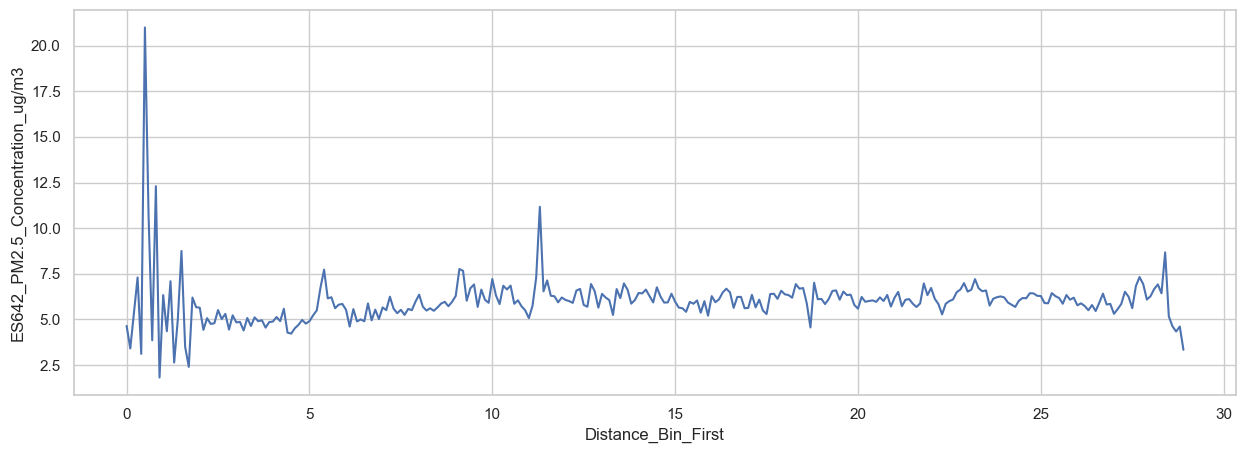

In [288]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=trx01_pm25_dist_grp, x='Distance_Bin_First', y='ES642_PM2.5_Concentration_ug/m3')

c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

<Axes: xlabel='Distance_km', ylabel='ES642_PM2.5_Concentration_ug/m3'>

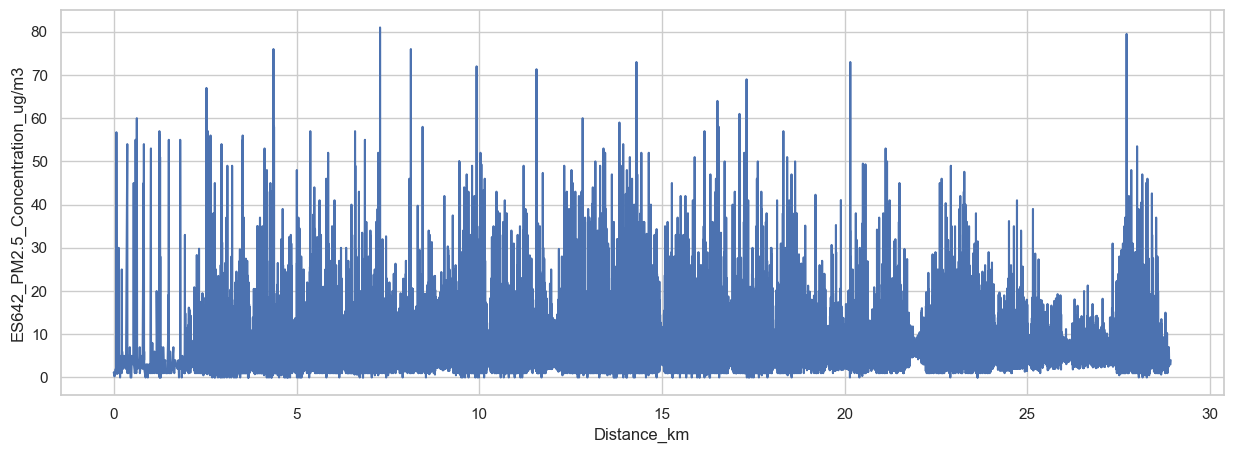

In [277]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=trx01_pm25_dist_avg, x='Distance_km', y='ES642_PM2.5_Concentration_ug/m3')

c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

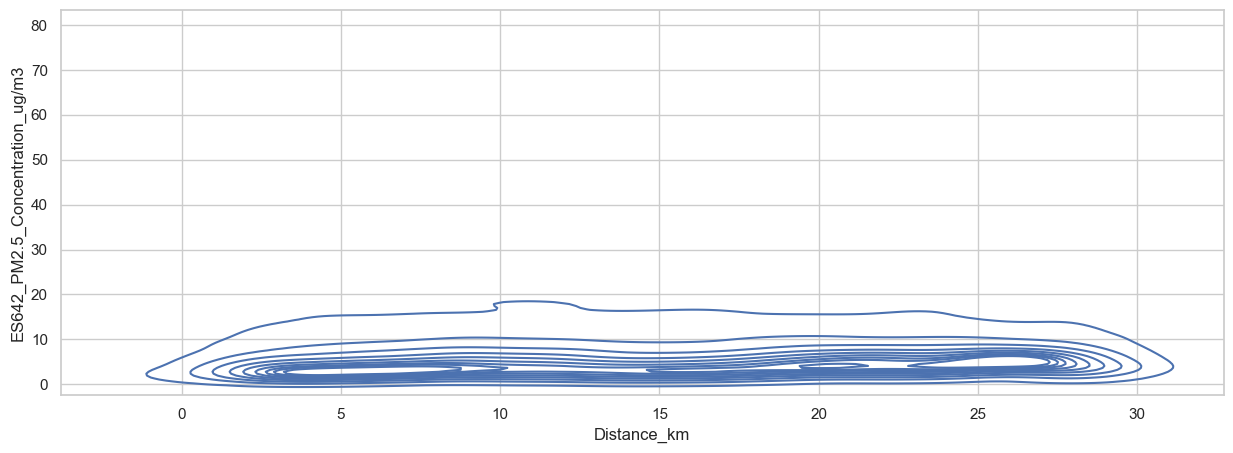

In [267]:
fig, ax = plt.subplots(figsize=(15, 5))

# Create a KDE plot
sns.kdeplot(data=trx01_pm25_dist_avg, x='Distance_km', y='ES642_PM2.5_Concentration_ug/m3', ax=ax)

plt.show()

In [276]:
trx01_pm25_avg_sorted['LatitudeBand'] = pd.cut(trx01_pm25_avg_sorted['Latitude_ddeg'], bins=100)
trx01_pm25_avg_sorted.head(20)

,Latitude_ddeg,Longitude_ddeg,ES642_PM2.5_Concentration_ug/m3,Moving_Avg,State_St_Long,Distance_km,LatitudeBand,DistanceBand,LatitudeBin
0,40.524826,-111.855080,1.000000,NaN,-111.888245,0.000000,"(40.525, 40.527]","(-0.0289, 0.289]",NaN
1,40.524830,-111.855080,1.200000,NaN,-111.888245,0.000444,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
2,40.524834,-111.855087,1.222222,1.140741,-111.888245,0.000888,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
3,40.524837,-111.855087,1.153846,1.192023,-111.888245,0.001221,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
4,40.524841,-111.855087,1.000000,1.125356,-111.888245,0.001666,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
5,40.524963,-111.855446,1.000000,1.051282,-111.888245,0.015213,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
6,40.524967,-111.855453,0.000000,0.666667,-111.888245,0.015657,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
7,40.524967,-111.855446,0.500000,0.500000,-111.888245,0.015657,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
8,40.525261,-111.859596,2.000000,0.833333,-111.888245,0.048304,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"
9,40.525269,-111.859596,2.000000,1.500000,-111.888245,0.049193,"(40.525, 40.527]","(-0.0289, 0.289]","(40.525, 40.527]"


In [269]:
avg_by_lat = trx01_pm25_avg_sorted.groupby('LatitudeBand')['ES642_PM2.5_Concentration_ug/m3'].mean()
avg_by_lat = avg_by_lat.reset_index()
avg_by_lat.head(20)

C:\Users\Raikou\AppData\Local\Temp\ipykernel_35768\2187405016.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_lat = trx01_pm25_avg_sorted.groupby('LatitudeBand')['ES642_PM2.5_Concentration_ug/m3'].mean()


,LatitudeBand,ES642_PM2.5_Concentration_ug/m3
0,"(40.525, 40.527]",4.107327
1,"(40.527, 40.53]",6.346154
2,"(40.53, 40.533]",13.708333
3,"(40.533, 40.535]",4.121212
4,"(40.535, 40.538]",6.409091
5,"(40.538, 40.54]",6.350000
6,"(40.54, 40.543]",4.936013
7,"(40.543, 40.546]",4.627762
8,"(40.546, 40.548]",4.899778
9,"(40.548, 40.551]",4.969836


c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

<Axes: ylabel='ES642_PM2.5_Concentration_ug/m3'>

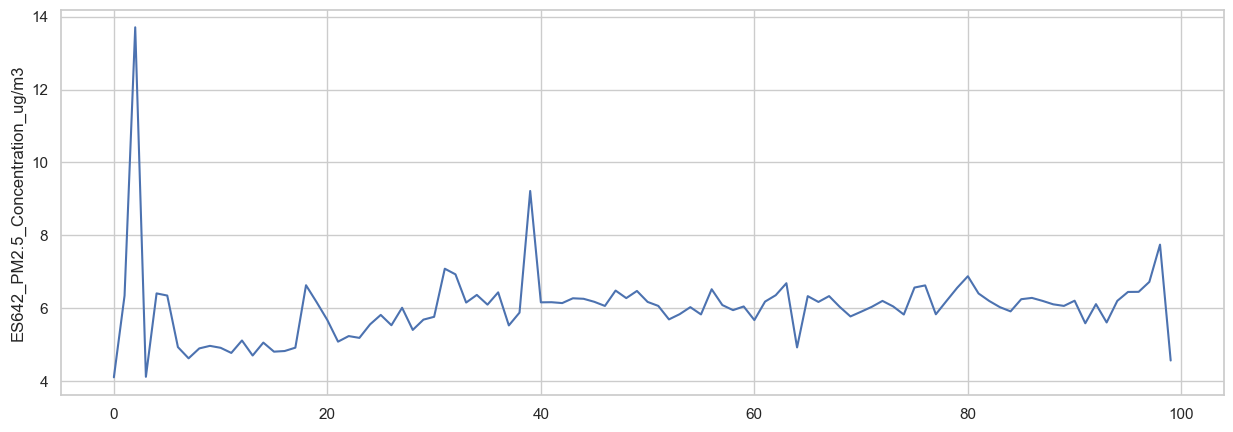

In [270]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(data=avg_by_lat, x=avg_by_lat.index, y='ES642_PM2.5_Concentration_ug/m3')